In [ ]:
# Importing the Necessary Libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from google.colab import drive
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [ ]:
# The shape of training set
trainX.shape

(60000, 28, 28)

In [ ]:
# Changing the labels to categorical type
trainy = tf.keras.utils.to_categorical(trainy)
testy = tf.keras.utils.to_categorical(testy)

In [ ]:
# Normalization of training and test sets 
train_norm = trainX / 255.0
test_norm = testX / 255.0

In [ ]:
# Train the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_568 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               540900    
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_______________________________________________

In [ ]:
# Compile the CNN model
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# Saving the Weight Parameters, When Achieving a Higher Test Accuracy
checkpoint = ModelCheckpoint(filepath='/content/model_cnn.h5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

history = model_cnn.fit(trainX, # Features
trainy, # Target vector
epochs=10,
callbacks=callbacks,
verbose=1, # Print description after each epoch
batch_size=64, # Number of observations per batch
validation_data=(testX, testy)) # Test data

Epoch 1/10
937/938 [============================>.] - ETA: 0s - loss: 7.6626 - accuracy: 0.7556
Epoch 1: val_accuracy improved from -inf to 0.87680, saving model to /content/model_cnn.h5
938/938 [==============================] - 32s 33ms/step - loss: 7.6594 - accuracy: 0.7556 - val_loss: 0.6210 - val_accuracy: 0.8768
Epoch 2/10
938/938 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.8993
Epoch 2: val_accuracy improved from 0.87680 to 0.94220, saving model to /content/model_cnn.h5
938/938 [==============================] - 33s 35ms/step - loss: 0.5550 - accuracy: 0.8993 - val_loss: 0.4253 - val_accuracy: 0.9422
Epoch 3/10
937/938 [============================>.] - ETA: 0s - loss: 0.3595 - accuracy: 0.9410
Epoch 3: val_accuracy improved from 0.94220 to 0.95230, saving model to /content/model_cnn.h5
938/938 [==============================] - 30s 32ms/step - loss: 0.3600 - accuracy: 0.9409 - val_loss: 0.3226 - val_accuracy: 0.9523
Epoch 4/10
937/938 [==============

In [ ]:
# Load the trained CNN model
network = load_model('/content/model_cnn.h5')

In [ ]:
# Create the feature extractor (using first FC layer)
feature_extractor = Model(inputs=network.input, outputs=network.layers[3].output)

In [ ]:
# Extract the features of images in the training set
features_train=feature_extractor.predict(trainX)
features_train=features_train.reshape(60000, 10, 10)

In [ ]:
# Extract the features of images in the test set
features_test=feature_extractor.predict(testX)
features_test=features_test.reshape(10000, 10, 10)

In [ ]:
# Create the LSTM network
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(10, 10), return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=10, activation="softmax"))
model_lstm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                19200     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 19,850
Trainable params: 19,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the LSTM network
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# Saving the Weight Parameters, When Achieving a Higher Test Accuracy
checkpoint = ModelCheckpoint(filepath='/content/lstm.h5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

history = model_lstm.fit(features_train, # Features
trainy, # Target vector
epochs=10,
callbacks=callbacks,
verbose=1, # Print description after each epoch
batch_size=64, # Number of observations per batch
validation_data=(features_test, testy)) # Test data

Epoch 1/10
936/938 [============================>.] - ETA: 0s - loss: 0.1990 - accuracy: 0.9537
Epoch 1: val_accuracy improved from -inf to 0.96940, saving model to /content/lstm.h5
938/938 [==============================] - 15s 14ms/step - loss: 0.1991 - accuracy: 0.9537 - val_loss: 0.1451 - val_accuracy: 0.9694
Epoch 2/10
935/938 [============================>.] - ETA: 0s - loss: 0.0974 - accuracy: 0.9759
Epoch 2: val_accuracy improved from 0.96940 to 0.97120, saving model to /content/lstm.h5
938/938 [==============================] - 12s 13ms/step - loss: 0.0972 - accuracy: 0.9760 - val_loss: 0.1345 - val_accuracy: 0.9712
Epoch 3/10
937/938 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9778
Epoch 3: val_accuracy did not improve from 0.97120
938/938 [==============================] - 11s 12ms/step - loss: 0.0856 - accuracy: 0.9779 - val_loss: 0.1351 - val_accuracy: 0.9695
Epoch 4/10
935/938 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy

In [ ]:
# Load the trained LSTM network
network = load_model('/content/lstm.h5')
model = Model(inputs=network.input, outputs=network.output)

In [ ]:
# Get the probabilties using the test features 
preds_prob=model.predict(features_test)

In [ ]:
# Get the class predicitons
preds=np.argmax(preds_prob, axis=1)

In [ ]:
preds

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# Create the test set labels to the range 0-9 (In the previous state, the classes are presented in binary form --> Example: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] means class 3
classes=[]
for i in range(len(testy)):
  a=np.argmax(testy[i])
  classes.append(a)

0.9726

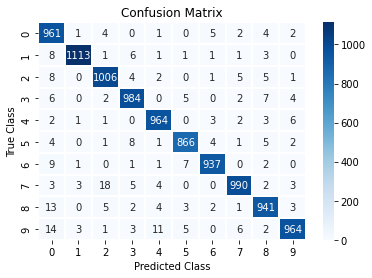

In [ ]:
# Creating Confusion Matrix
cf_matrix=confusion_matrix(classes, preds)
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1','2', '3','4', '5','6', '7','8', '9']); ax.yaxis.set_ticklabels(['0', '1','2', '3','4', '5','6', '7','8', '9'])
accuracy_score(classes, preds)